In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#!pip install pdfplumber
import pdfplumber

movie_data = pd.read_csv("IMDB-Movie-Data.csv")
movie_data = movie_data[pd.notnull(movie_data['Revenue (Millions)'])].reset_index()
movie_data.drop(columns=['index'], inplace = True)
change_types = ['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']
for i in change_types:
    movie_data[[i]] = movie_data[[i]].apply(pd.to_numeric)
movie_data['Genre'] = movie_data['Genre'].apply(lambda x: x.split(','))
movie_data['Actors'] = movie_data['Actors'].apply(lambda x: re.split(',\s?', x))
movie_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael F...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"[Horror, Thriller]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Richa...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"[Animation, Comedy, Family]","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"[Matthew McConaughey, Reese Witherspoon, Seth ...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"[Action, Adventure, Fantasy]",A secret government agency recruits some of th...,David Ayer,"[Will Smith, Jared Leto, Margot Robbie, Viola ...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"[Action, Adventure, Fantasy]",European mercenaries searching for black powde...,Yimou Zhang,"[Matt Damon, Tian Jing, Willem Dafoe, Andy Lau]",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"[Comedy, Drama, Music]",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"[Ryan Gosling, Emma Stone, Rosemarie DeWitt, J...",2016,128,8.3,258682,151.06,93.0
7,9,The Lost City of Z,"[Action, Adventure, Biography]","A true-life drama, centering on British explor...",James Gray,"[Charlie Hunnam, Robert Pattinson, Sienna Mill...",2016,141,7.1,7188,8.01,78.0
8,10,Passengers,"[Adventure, Drama, Romance]",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"[Jennifer Lawrence, Chris Pratt, Michael Sheen...",2016,116,7.0,192177,100.01,41.0
9,11,Fantastic Beasts and Where to Find Them,"[Adventure, Family, Fantasy]",The adventures of writer Newt Scamander in New...,David Yates,"[Eddie Redmayne, Katherine Waterston, Alison S...",2016,133,7.5,232072,234.02,66.0


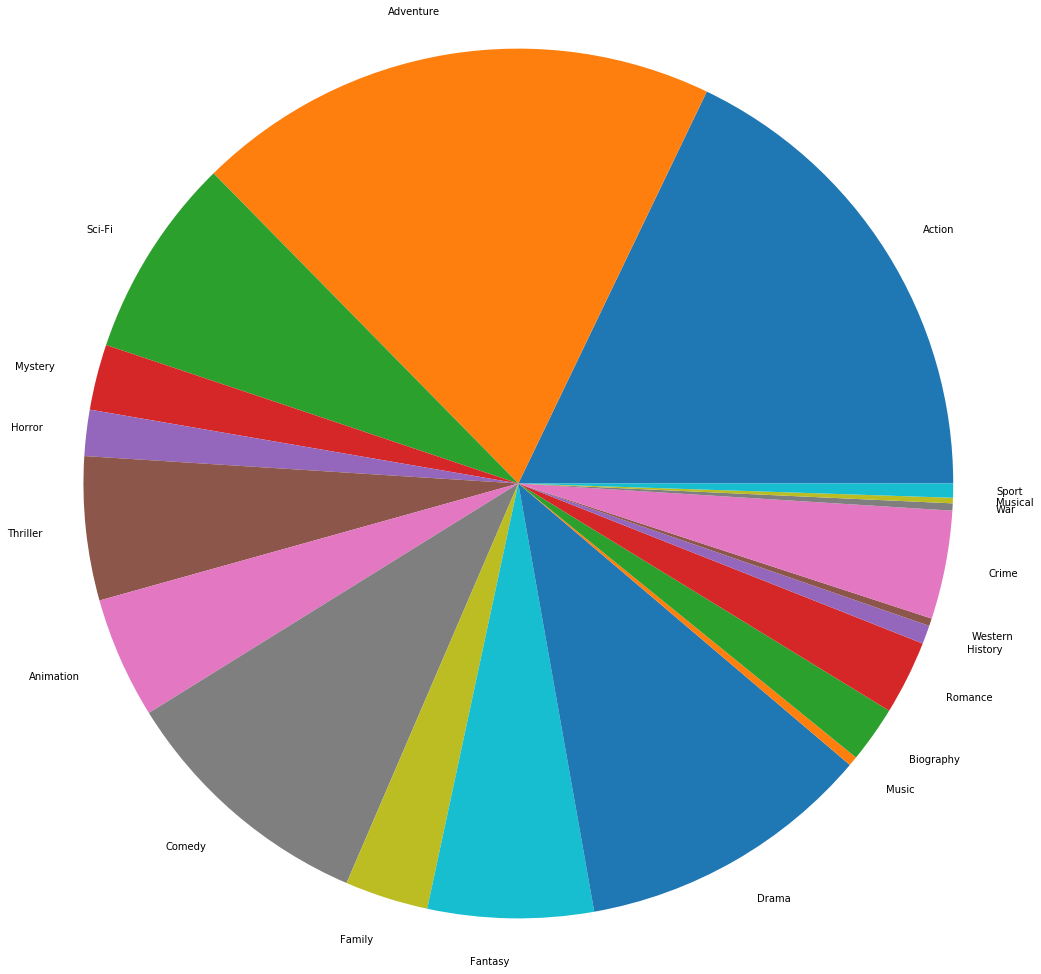

In [52]:
'''
Gets each genre and maps how much each genre made (allows multiple overlaps).
'''

genre_list = {}
for i in range(len(movie_data['Genre'])):
    for j in movie_data.loc[i,'Genre']:
        if j in genre_list:
            genre_list[j] = genre_list[j] + movie_data.loc[i,'Revenue (Millions)']
        else:
            genre_list[j] = movie_data.loc[i,'Revenue (Millions)']
plt.pie(genre_list.values(), labels = genre_list.keys(), radius = 5)
plt.show()

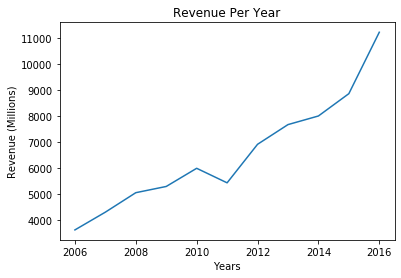

In [60]:
revenue = []
for i in np.unique(movie_data['Year']):
    revenue.append(sum(movie_data[movie_data['Year'] == i]['Revenue (Millions)']))
plt.plot(np.unique(movie_data['Year']), revenue)
plt.xlabel('Years')
plt.ylabel('Revenue (Millions)')
plt.title('Revenue Per Year')
plt.show()

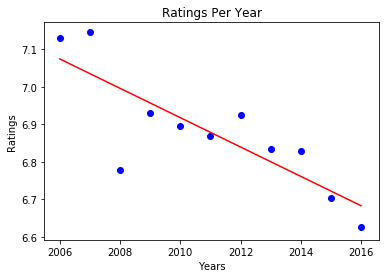

In [73]:
x = np.unique(movie_data['Year'])
y = []
for i in x:
    temp = movie_data[movie_data['Year'] == i]
    y.append(sum(temp['Rating'])/len(temp))
    plt.scatter(i, y[-1], c = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, c = 'r')
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Ratings Per Year')
plt.show()

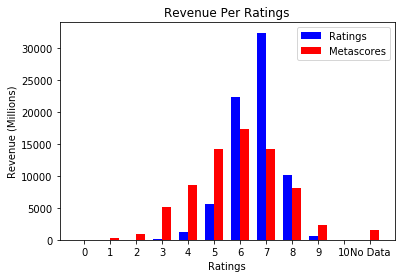

In [108]:
'''
This floors the ratings i.e. 4.3 and 4.9 would both be in the 4 category. It then graphs the revenue per ratings.
Does the same with Metascore and puts them side by side. Can be a comparison here.
'''

import math
rev_per_rating = [0] * 12
rev_per_meta = [0] * 12
for index in range(len(list(movie_data['Rating']))):
    rev_per_rating[math.floor(movie_data.loc[index,'Rating'])] += movie_data.loc[index,'Revenue (Millions)']
    if math. isnan(movie_data.loc[index,'Metascore']):
        rev_per_meta[-1] += movie_data.loc[index,'Revenue (Millions)']
    else:
        rev_per_meta[math.floor((movie_data.loc[index,'Metascore'])/10)] += movie_data.loc[index,'Revenue (Millions)']
plt.bar(np.arange(12), rev_per_rating, 0.35, color = 'b', label = "Ratings")
plt.bar(np.arange(12)+0.35, rev_per_meta, 0.35, color = 'r', label = "Metascores")
plt.xlabel('Ratings')
plt.ylabel('Revenue (Millions)')
plt.title('Revenue Per Ratings')
plt.xticks(np.arange(12)+0.35 / 2,['0','1','2','3','4','5','6','7','8','9','10',"No Data"])
plt.legend(loc = 'best')
plt.show()

In [27]:
def get_val(dictionary, val):
    for k, v in dictionary.items():
        if val == v:
            return k
        
movie_data2 = movie_data.copy(deep=True)
sorted_genres = sorted(genre_list.items(), key=lambda x: x[1], reverse = True)
ranked_genre_list = {}
rank = 1
for i in sorted_genres:
    ranked_genre_list[get_val(genre_list, i[1])] = rank
    rank += 1

genre = []
for i in list(movie_data2['Genre']):
    element = []
    for j in i:
        element.append(ranked_genre_list[j])
    genre.append(element)
movie_data2['Genre'] = genre
movie_data2

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"[2, 1, 5]",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"[1, 12, 5]","Following clues to the origin of mankind, a te...",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael F...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"[14, 7]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Richa...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"[8, 4, 10]","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"[Matthew McConaughey, Reese Witherspoon, Seth ...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"[2, 1, 6]",A secret government agency recruits some of th...,David Ayer,"[Will Smith, Jared Leto, Margot Robbie, Viola ...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"[2, 1, 6]",European mercenaries searching for black powde...,Yimou Zhang,"[Matt Damon, Tian Jing, Willem Dafoe, Andy Lau]",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"[4, 3, 17]",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"[Ryan Gosling, Emma Stone, Rosemarie DeWitt, J...",2016,128,8.3,258682,151.06,93.0
7,9,The Lost City of Z,"[2, 1, 13]","A true-life drama, centering on British explor...",James Gray,"[Charlie Hunnam, Robert Pattinson, Sienna Mill...",2016,141,7.1,7188,8.01,78.0
8,10,Passengers,"[1, 3, 11]",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"[Jennifer Lawrence, Chris Pratt, Michael Sheen...",2016,116,7.0,192177,100.01,41.0
9,11,Fantastic Beasts and Where to Find Them,"[1, 10, 6]",The adventures of writer Newt Scamander in New...,David Yates,"[Eddie Redmayne, Katherine Waterston, Alison S...",2016,133,7.5,232072,234.02,66.0


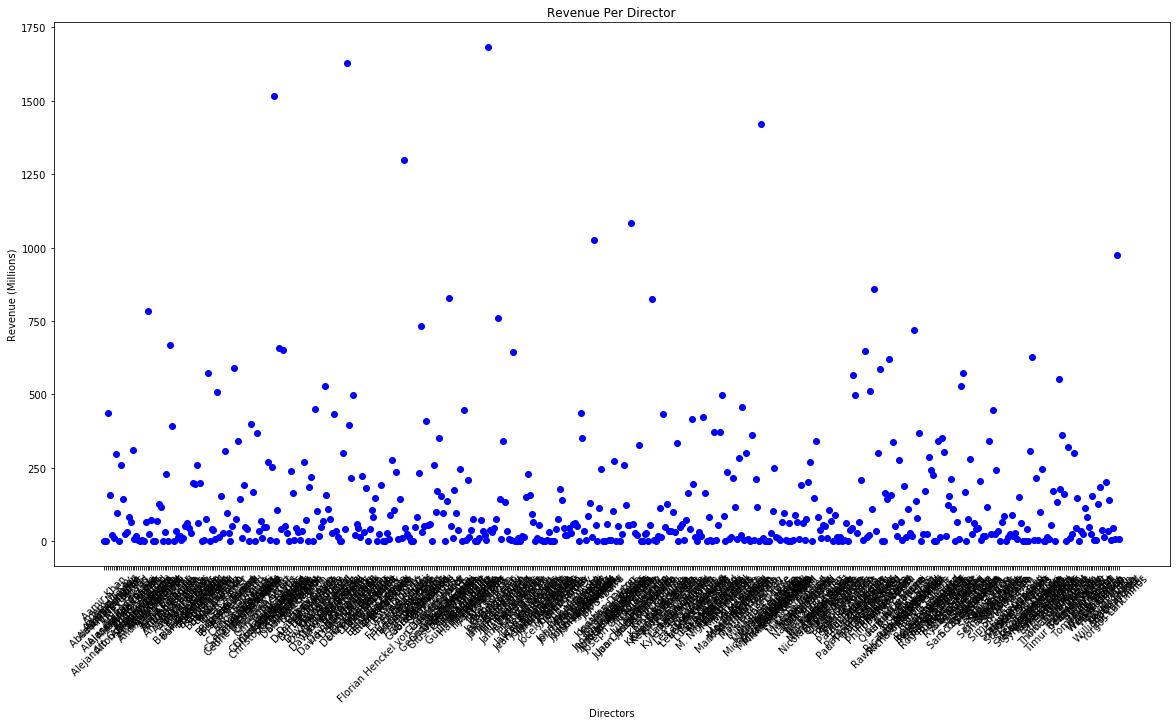

In [28]:
'''
Rough plot. Takes some time to actually display the scatterplot. 
Labels are a mess but it works. Should be 540 unique values and points
'''

directors = list(np.unique(movie_data['Director']))
plt.figure(figsize = (20, 10))
for i in directors:
    temp_data = movie_data[movie_data['Director'] == i]
    plt.plot(i,sum(temp_data['Revenue (Millions)']), 'o', c='b')
plt.title('Revenue Per Director')
plt.xlabel('Directors')
plt.ylabel('Revenue (Millions)')
plt.xticks(rotation = 45)
plt.show()

In [29]:
'''
Read datasets in changed points to actual numbers to make it easier to use
'''

actor_data = pd.read_csv("imdb_actors.csv", encoding='latin-1')
actress_data = pd.read_csv("imdb_actresses.csv", encoding='latin-1')
director_data = pd.read_csv("imdb_directors.csv", encoding='latin-1')

def to_num(lst):
    ret = []
    for i in range(len(lst)):
        x = re.search("(\d+)[^\d]*", lst[i])
        ret.append(int(x.group(1)))
    return ret

actor_data['Description'] = to_num(actor_data['Description'])
actor_data.rename(columns={"Description": "Points"}, inplace = True)
actor_data = actor_data.filter(['Points', 'Name'])

actress_data['Description'] = to_num(actress_data['Description'])
actress_data.rename(columns={"Description": "Points"}, inplace = True)
actress_data = actress_data.filter(['Points', 'Name'])

imdb_cast_key = pd.concat([actor_data, actress_data])
imdb_cast_key = imdb_cast_key.sort_values('Points', ascending = False).reset_index(drop=True)

director_data['Description'] = to_num(director_data['Description'])
director_data.rename(columns={"Description": "Points"}, inplace = True)
imdb_director_key = director_data.filter(['Points', 'Name'])

imdb_cast_key

,Points,Name
0,167820,Morgan Freeman
1,160473,Brad Pitt
2,157865,Leonardo DiCaprio
3,151313,Robert De Niro
4,140716,Matt Damon
5,137003,Michael Caine
6,126932,Christian Bale
7,118663,Tom Hanks
8,112643,Gary Oldman
9,105941,Al Pacino


In [ ]:
def pdf_to_df(file):
    pdfdump = ""
    with pdfplumber.open(file) as pdf:
        for page in range(0, 6):
            pdfdump += pdf.pages[page].extract_text()
            pdfdump += "\n"
            
    key = {"Name":[], "Rank":[], "Fame(%)":[], "Popularity(%)":[]}
    for line in pdfdump.splitlines():
            match = re.search("(\d+)\s(.*)\s(\d+)%\s(\d+)%",line)
            if match:
                key["Name"].append(match.group(2))
                key["Rank"].append(match.group(1))
                key["Fame(%)"].append(match.group(3))
                key["Popularity(%)"].append(match.group(4))

    return pd.DataFrame(key)

In [ ]:
yga_cast_key = pdf_to_df('yga_cast.pdf')
yga_cast_key

In [ ]:
yga_director_key = pdf_to_df('yga_directors.pdf')
yga_director_key

In [ ]:
'''
Address that there are 1492 actors/actress that dont have point associated
https://today.yougov.com/ratings/entertainment/popularity/all-time-actors-actresses/all
'''
def avg_cast(x, key_data, label):
    cast_lst = x['Actors']
    sum = 0
    cast_count = 0
    for cast_mem in cast_lst:
        if not key_data[key_data['Name'] == cast_mem].empty:
            pts = int(key_data.loc[key_data['Name'] == cast_mem, label].iloc[0])
            sum += pts
            cast_count += 1
        else:
            missing_cast.add(cast_mem)
    if cast_count:
        return (sum/cast_count)
    else:
        return 0
        
            

missing_cast = set()
movie_data['imdb_avg_cast_pts'] = movie_data.apply(lambda x: avg_cast(x, imdb_cast_key, "Points"), axis = 1)
print("# of IMDB Missing Cast Members: ", len(missing_cast))            
            
missing_cast = set()
movie_data['yga_avg_cast_rank'] = movie_data.apply(lambda x: avg_cast(x, yga_cast_key, "Rank"), axis = 1)
print("# of YGA Missing Cast Members: ", len(missing_cast))

In [ ]:
def avg_directors(x, key_data, label):
    if not key_data[key_data['Name'] == x['Director']].empty:
        return int(key_data.loc[key_data['Name'] == x['Director'], label].iloc[0])
    else:
        missing_directors.add(x['Director'])
        return 0
        
            
missing_directors = set()
movie_data['imdb_avg_director_pts'] = movie_data.apply(lambda x: avg_directors(x, imdb_director_key, "Points"), axis = 1)
print("# of IMDB Missing Directors: ", len(missing_directors))
            
missing_directors = set()
movie_data['yga_avg_director_rank'] = movie_data.apply(lambda x: avg_directors(x, yga_director_key, "Rank"), axis = 1)
print("# of YGA Missing Directors: ", len(missing_directors))

In [ ]:
movie_data.describe()